In [20]:
# First we need to read in the required packages
import cv2,os
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [30]:
data_path='/Users/yuchenzhang/Desktop/2021-2022/FALL/PIC16B/MasksPlease/MasksPlease/dataset2'
categories=os.listdir(data_path)
labels=[i for i in range(0, len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


In [31]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here.

In [33]:
len(train_data)

854

In [32]:
"""
In this part we transform the numeric value to between 0 and 1
to speed up the training process, and reshape the image
to a smaller size
"""
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

new_target=np_utils.to_categorical(target)
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [35]:
"""
In our model we include two convolutional 2D layers, two
max pooling layers, two dropout layers to avoid overfitting, 
a flatten layer, and finally two dense layers to match
the number of classes in the output
"""
model1 = models.Sequential([
    layers.Conv2D(100,(3,3), activation='relu', input_shape=data.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(100,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(25, activation='relu'),
    layers.Dense(2,activation='softmax')
])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_data,
                     train_target, 
                     epochs=20,
                     validation_split=0.2)

Epoch 1/20
22/22 [==============================] - 9s 371ms/step - loss: 0.8326 - accuracy: 0.5490 - val_loss: 0.6933 - val_accuracy: 0.4094
Epoch 2/20
22/22 [==============================] - 8s 379ms/step - loss: 0.6883 - accuracy: 0.5666 - val_loss: 0.6685 - val_accuracy: 0.5906
Epoch 3/20
22/22 [==============================] - 8s 379ms/step - loss: 0.6715 - accuracy: 0.5739 - val_loss: 0.6482 - val_accuracy: 0.5848
Epoch 4/20
22/22 [==============================] - 8s 361ms/step - loss: 0.6458 - accuracy: 0.6018 - val_loss: 0.6140 - val_accuracy: 0.6140
Epoch 5/20
22/22 [==============================] - 8s 365ms/step - loss: 0.5962 - accuracy: 0.6735 - val_loss: 0.5468 - val_accuracy: 0.7018
Epoch 6/20
22/22 [==============================] - 8s 368ms/step - loss: 0.5082 - accuracy: 0.7628 - val_loss: 0.4391 - val_accuracy: 0.8187
Epoch 7/20
22/22 [==============================] - 8s 364ms/step - loss: 0.4528 - accuracy: 0.7804 - val_loss: 0.4115 - val_accuracy: 0.8596
Epoch 

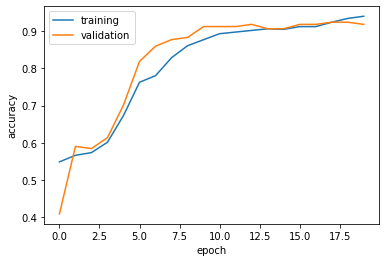

In [36]:
"""
Our results proved to be pretty precise and there
is no apparent sign of overfitting.
"""
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy") # gca: get current axis 
plt.legend()